In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [201]:
df= pd.read_csv('BankChurners.csv')

In [202]:
df['eill_Attrition_Flag']=(
    df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']>df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
).astype(int)   

In [203]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,eill_Attrition_Flag
5330,826417233,Existing Customer,35,F,4,College,Married,Less than $40K,Blue,31,...,1011,1922.0,0.814,5089,71,0.868,0.345,0.000526,0.99947,0
2226,789530208,Existing Customer,54,F,2,Graduate,Married,Less than $40K,Blue,46,...,2517,220.0,0.533,1619,37,0.480,0.920,0.000114,0.99989,0
9961,788890533,Existing Customer,54,M,2,College,Married,$80K - $120K,Silver,39,...,2305,32211.0,0.586,13756,106,0.710,0.067,0.000139,0.99986,0
7728,714060408,Existing Customer,57,F,3,High School,Single,Unknown,Blue,37,...,1603,1449.0,0.776,4210,82,0.907,0.525,0.000056,0.99994,0
3265,719036883,Existing Customer,48,F,1,Uneducated,Divorced,Less than $40K,Blue,38,...,0,4668.0,0.896,4163,77,0.453,0.000,0.000174,0.99983,0
2243,719385558,Existing Customer,62,F,0,College,Married,$40K - $60K,Blue,49,...,0,1438.3,0.757,1281,32,1.000,0.000,0.000046,0.99995,0
9116,823539558,Existing Customer,39,F,3,Uneducated,Single,Unknown,Silver,35,...,1627,31938.0,0.660,8360,94,0.843,0.048,0.000185,0.99982,0
3017,803415183,Existing Customer,44,M,3,Unknown,Single,$80K - $120K,Silver,38,...,657,33859.0,0.641,4614,76,0.689,0.019,0.000112,0.99989,0
5329,721163133,Existing Customer,44,M,2,Graduate,Single,Unknown,Blue,36,...,0,28292.0,0.542,3948,60,0.538,0.000,0.000108,0.99989,0
1549,717837858,Existing Customer,47,M,5,College,Married,$120K +,Blue,34,...,1063,16540.0,1.065,2902,64,0.641,0.060,0.000055,0.99994,0


In [204]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'eill_Attrition_Flag'],
      dtype='object')

In [205]:
df['Total_Relationship_Count']

0        5
1        6
2        4
3        3
4        5
        ..
10122    3
10123    4
10124    5
10125    4
10126    6
Name: Total_Relationship_Count, Length: 10127, dtype: int64

In [206]:
df.shape

(10127, 24)

In [207]:
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [208]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,eill_Attrition_Flag
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


## EDA

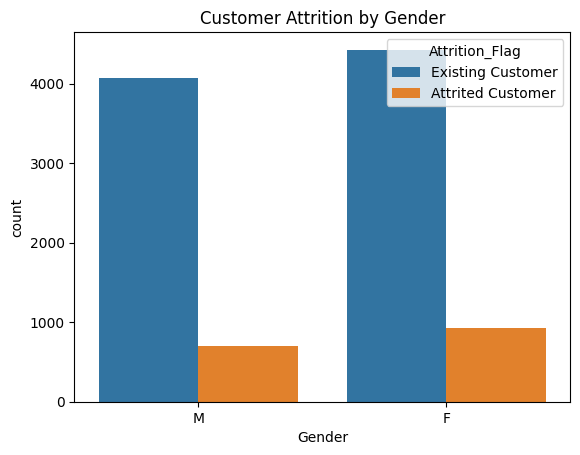

In [209]:
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')
plt.title('Customer Attrition by Gender')
plt.show()

Using This graph we got inshits to identify if there's a gender-based trend in customer attrition.

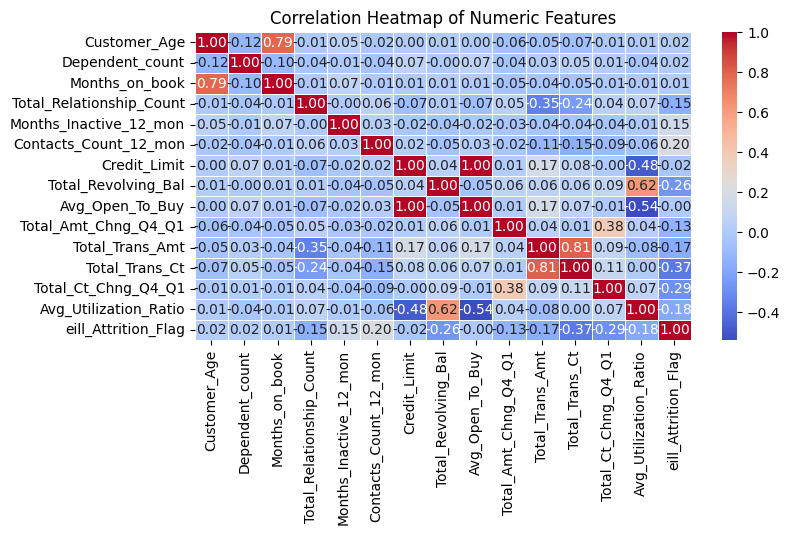

In [210]:
plt.figure(figsize=(8,4))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


Inshits:
total_trans_ct and total_trans_amt have strong correlation with customer activity.
months_inactive_12_mon and contacts_count_12_mon are positively correlated with attrition, indicating that inactivity and frequent customer service contact may signal dissatisfaction.

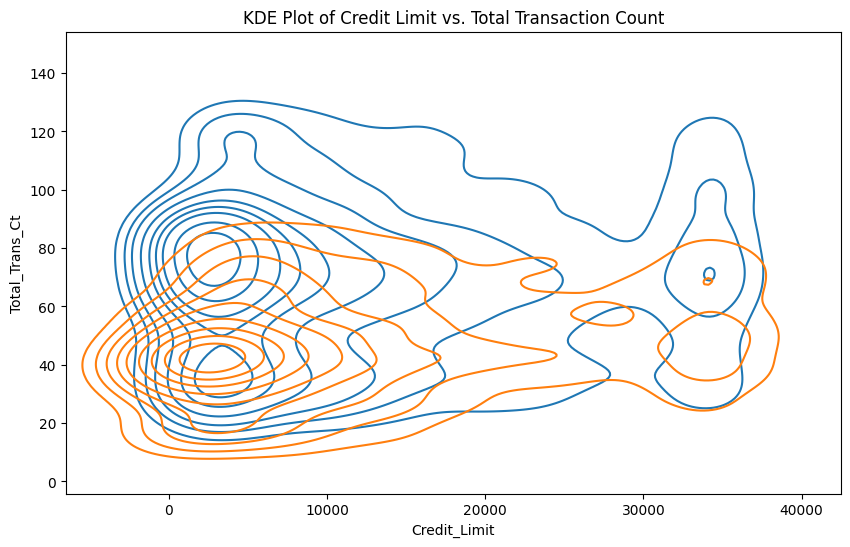

In [211]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['eill_Attrition_Flag'] == 0], x='Credit_Limit', y='Total_Trans_Ct',label='Existing')
sns.kdeplot(data=df[df['eill_Attrition_Flag'] == 1], x='Credit_Limit', y='Total_Trans_Ct',  label='Attrited')

plt.title('KDE Plot of Credit Limit vs. Total Transaction Count')
plt.show()

using this graph we get inshits that existing customers has higher credit_limit and higher total_trans_ct
where Attrited customers has lower credit_limit and lower total_trans_ct

<Axes: xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

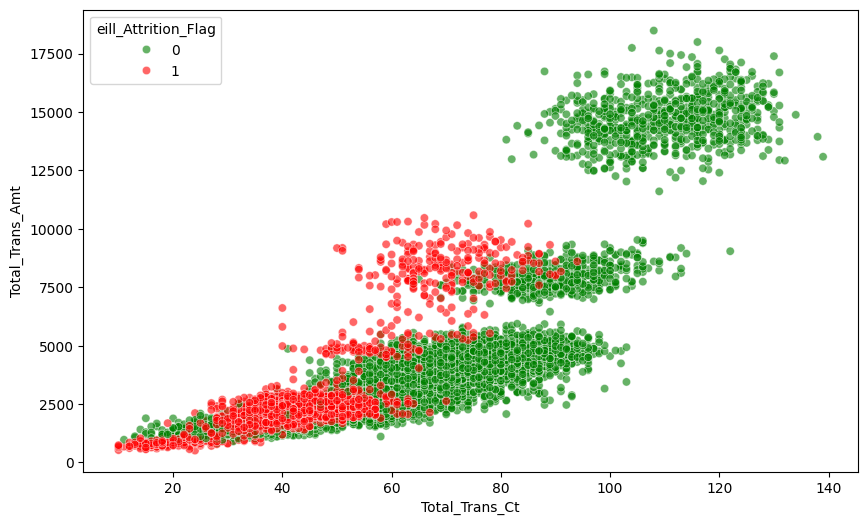

In [212]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Total_Trans_Ct',
    y='Total_Trans_Amt',
    hue='eill_Attrition_Flag',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)

inshits:
attrited customers (red) tend to cluster in the lower transaction count and amount zone.
existing customers (green) are spread wider and include higher transaction activity, suggesting active usage reduces churn.

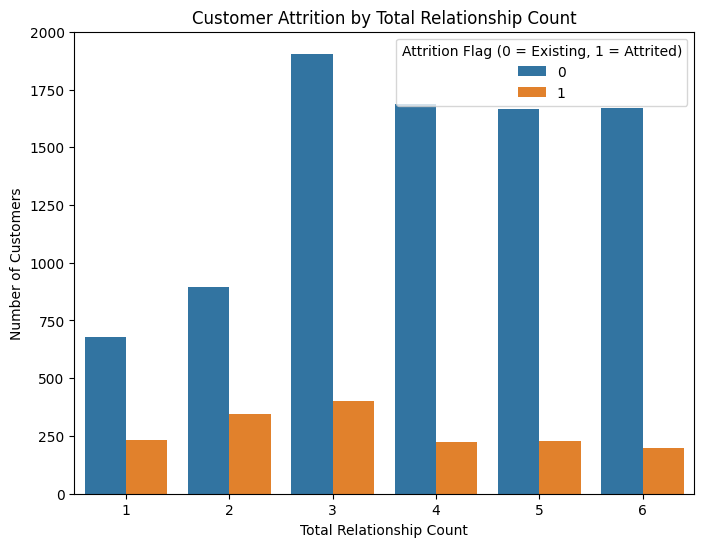

In [213]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Total_Relationship_Count', hue='eill_Attrition_Flag')
plt.title('Customer Attrition by Total Relationship Count')
plt.xlabel('Total Relationship Count')
plt.ylabel('Number of Customers')
plt.legend(title='Attrition Flag (0 = Existing, 1 = Attrited)')
plt.show()

inshits:most customers with fewer products (1 or 2) are more likely to attrite and customers with 4 or more relationships are mostly retained.

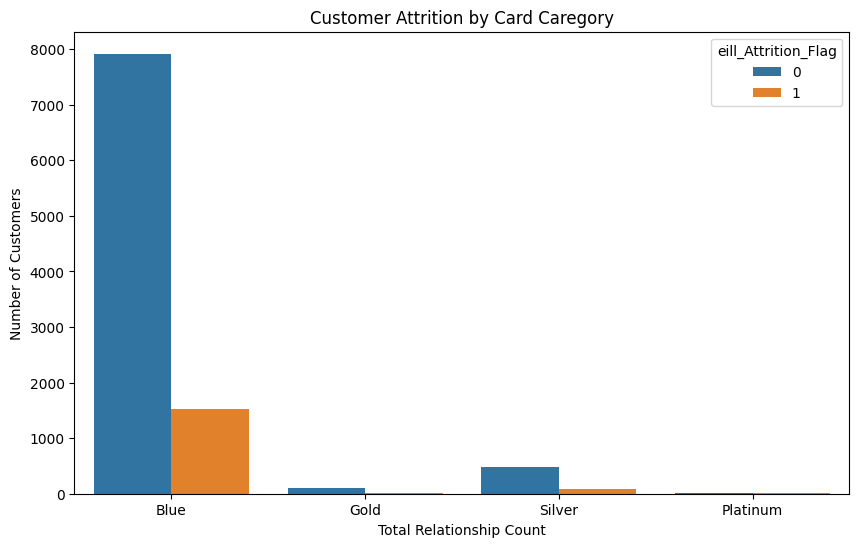

In [214]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Card_Category',hue='eill_Attrition_Flag')
plt.title('Customer Attrition by Card Caregory')
plt.xlabel('Total Relationship Count')
plt.ylabel('Number of Customers')
plt.show()

inshits:most of the customer who has blue card category it high chance to retain

## Data Transformation for model Training

In [215]:
df.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,eill_Attrition_Flag
7188,Existing Customer,45,F,3,Unknown,Single,Less than $40K,Blue,36,3,...,0,1438.3,0,1438.3,0.678,4463,71,0.821,0.0,0
5165,Attrited Customer,39,F,4,High School,Single,Unknown,Blue,36,3,...,4,12405.0,0,12405.0,0.949,3151,39,0.444,0.0,1
8174,Existing Customer,38,M,1,Unknown,Single,$80K - $120K,Blue,29,2,...,3,10972.0,0,10972.0,0.697,4401,73,0.698,0.0,0
9957,Existing Customer,43,M,4,Graduate,Unknown,$40K - $60K,Blue,38,5,...,3,3771.0,0,3771.0,0.675,14662,125,0.667,0.0,0
3060,Existing Customer,36,M,1,Graduate,Single,$120K +,Blue,20,3,...,2,34516.0,0,34516.0,0.531,2686,59,0.788,0.0,0


In [216]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
eill_Attrition_Flag         0
dtype: int64

we check any null values has in dataset or not 

In [218]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'eill_Attrition_Flag'],
      dtype='object')

In [219]:
df.drop(['Attrition_Flag','Gender','Marital_Status','Avg_Open_To_Buy'], axis=1, inplace=True)

Here we drop some columns which are less important for model trainning.after drop some columns model use less computational power.

In [220]:
df.shape

(10127, 17)

In [221]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [231]:
x_cat=df.select_dtypes(include=['object']).columns.tolist()
x_num=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
x_num.remove('eill_Attrition_Flag')

In [232]:
process=ColumnTransformer(
    transformers=[
        ('cat',Pipeline([
            ('onehot',OneHotEncoder(sparse_output=True, handle_unknown='ignore')),
            
        ]), x_cat),
        ('num',Pipeline([
            ('scalar',StandardScaler())
        ]),x_num)
    ]
)

Create a columntransformer which encode category in num values and for numerical values perform standarization set all value in same range.

In [233]:
pipe=Pipeline(steps=[
    ('process',process),
    
])

Create a pipeline for columntransformation

In [234]:
x=df.drop('eill_Attrition_Flag', axis=1)
y=df['eill_Attrition_Flag']

diffrenciate in independant and depandant features

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

split data in tainnig and testing

In [235]:
x_train= pipe.fit_transform(x_train)
x_test= pipe.transform(x_test)

In [237]:
x_train=pd.DataFrame(x_train,columns=pipe.named_steps['process'].get_feature_names_out())
x_test=pd.DataFrame(x_test,columns=pipe.named_steps['process'].get_feature_names_out())

conver x_train and x_test into dataframe

In [238]:
x_train

,cat__Education_Level_College,cat__Education_Level_Doctorate,cat__Education_Level_Graduate,cat__Education_Level_High School,cat__Education_Level_Post-Graduate,cat__Education_Level_Uneducated,cat__Education_Level_Unknown,cat__Income_Category_$120K +,cat__Income_Category_$40K - $60K,cat__Income_Category_$60K - $80K,...,num__Total_Relationship_Count,num__Months_Inactive_12_mon,num__Contacts_Count_12_mon,num__Credit_Limit,num__Total_Revolving_Bal,num__Total_Amt_Chng_Q4_Q1,num__Total_Trans_Amt,num__Total_Trans_Ct,num__Total_Ct_Chng_Q4_Q1,num__Avg_Utilization_Ratio
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.405385,-0.338506,0.489295,-0.731505,0.150465,0.810556,-0.895531,-0.679217,-0.089453,1.346854
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.122349,0.650400,-0.411564,-0.614437,1.229763,-0.225843,-0.694248,-0.679217,-0.955509,1.578163
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.519170,-0.338506,2.291013,1.716566,0.285684,-0.221297,3.083738,2.559835,0.210498,-0.792760
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.519170,3.617116,-0.411564,-0.194797,0.345919,0.342358,-0.278971,0.002688,-0.000735,-0.232557
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.405385,2.628210,-0.411564,-0.446514,-0.170374,0.174171,-0.092761,0.514118,-0.592188,-0.185573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.405385,0.650400,0.489295,-0.453970,-1.434062,-0.353120,-0.312370,0.087927,-0.326034,-1.002385
8097,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.763867,0.650400,0.489295,-0.645151,0.322562,-0.194024,0.211972,0.386260,-0.283788,0.869777
8098,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.519170,-0.338506,0.489295,-0.742855,-1.434062,-1.098599,-0.572768,-1.318504,-1.242786,-1.002385
8099,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.519170,-1.327411,0.489295,-0.684433,0.299206,0.478726,0.004186,0.599356,0.717457,1.115544


## Classification

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [251]:
lg=LogisticRegression(penalty='l2')
lg.fit(x_train, y_train)

LogisticRegression()

create a object of logistic regression and train model based on trainning dataset

In [249]:
y_pred=lg.predict(x_test)
accuracy_score(y_pred,y_test)

0.8963474827245804

find accuracy using confussion matrics and modal was 89% accurate

## Naive bias classification

In [246]:
naive_bayes=GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [247]:
y_pred=naive_bayes.predict(x_test)
accuracy_score(y_pred,y_test)

0.8726554787759131

## KNN

In [252]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred=KNN.predict(x_test)
accuracy_score(y_pred,y_test)

0.9146100691016782

## SVC

In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [261]:
param_grid_svc={
    'C':[0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [262]:
s=SVC()
grid_svc=GridSearchCV(s,param_grid_svc,cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [263]:
print("Best parameters for SVC:", grid_svc.best_params_)

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [264]:
s_classifier=SVC(**grid_svc.best_params_)
s_classifier.fit(x_train, y_train)

SVC(C=10)

In [265]:
y_pred=s_classifier.predict(x_test)
accuracy_score(y_pred,y_test)

0.9452122408687068

## Decision tree

In [266]:
de=DecisionTreeClassifier()
param_grid_svc={
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 10, 15,25],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

In [267]:
d_grid=GridSearchCV(de,param_grid_svc,cv=10, scoring='accuracy', n_jobs=-1)
d_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [269]:
d_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [270]:
d=DecisionTreeClassifier(**d_grid.best_params_)
d.fit(x_train, y_train)
y_pred=d.predict(x_test)
accuracy_score(y_pred,y_test)

0.9397828232971372

## Random forest

In [271]:
r_param_grid={
    'n_estimators':[50, 100, 200],
    'max_depth':[None, 5, 10, 15],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'criterion':['gini', 'entropy']
}

In [272]:
r=RandomForestClassifier()
grid_r=GridSearchCV(r,r_param_grid,cv=5, scoring='accuracy', n_jobs=-1)
grid_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [273]:
grid_r.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [274]:
randomf=RandomForestClassifier(**grid_r.best_params_)
randomf.fit(x_train, y_train)
y_pred=randomf.predict(x_test)
accuracy_score(y_pred,y_test)

0.9536031589338598